# Importing libraries and Datasets

In [246]:
##import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [247]:
#import dataset
sales_data = pd.read_csv('Interactive Excel Dashboard _ Sample Data.csv')
sales_data.head()

,Order ID,Date,Customer ID,Customer Name,Sales Person,Region,Item,Price,Quantity,Revenue
0,1,01/01/2018,11,Company K,Michael Fox,New Mexico,Item 2,199,3,597
1,2,02/01/2018,1,Company A,Anna Weber,Texas,Item 5,289,7,2023
2,3,03/01/2018,9,Company I,Kim Fishman,California,Item 4,159,3,477
3,4,03/01/2018,18,Company R,Oscar Knox,Arizona,Item 5,289,3,867
4,5,04/01/2018,16,Company P,Oscar Knox,Arizona,Item 3,69,4,276


In [248]:
sales_data[['Item','Price']]

,Item,Price
0,Item 2,199
1,Item 5,289
2,Item 4,159
3,Item 5,289
4,Item 3,69
...,...,...
1995,Item 3,69
1996,Item 3,69
1997,Item 1,399
1998,Item 5,289


### Data Cleaning

In [249]:
sales_data[['Day', 'Month', 'Year']] = split_sales_data = sales_data['Date'].str.split('/', n=2, expand=True)

In [250]:
sales_data.drop('Date', axis=1, inplace=True)
sales_data.drop('Day', axis=1, inplace=True)

In [251]:
sales_data['Month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],
                           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)

## Understanding the Data

In [252]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       2000 non-null   int64 
 1   Customer ID    2000 non-null   int64 
 2   Customer Name  2000 non-null   object
 3   Sales Person   2000 non-null   object
 4   Region         2000 non-null   object
 5   Item           2000 non-null   object
 6   Price          2000 non-null   int64 
 7   Quantity       2000 non-null   int64 
 8   Revenue        2000 non-null   int64 
 9   Month          2000 non-null   object
 10  Year           2000 non-null   object
dtypes: int64(5), object(6)
memory usage: 172.0+ KB


In [253]:
sales_data.describe()

,Order ID,Customer ID,Price,Quantity,Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,10.453500,223.670000,4.559500,1014.295500
std,577.494589,5.754685,112.410004,2.842622,878.388392
min,1.000000,1.000000,69.000000,0.000000,0.000000
25%,500.750000,5.000000,159.000000,2.000000,345.000000
50%,1000.500000,10.000000,199.000000,5.000000,795.000000
75%,1500.250000,15.000000,289.000000,7.000000,1445.000000
max,2000.000000,20.000000,399.000000,9.000000,3591.000000


In [254]:
sales_data['Region'].value_counts()

Texas         515
California    498
New Mexico    494
Arizona       493
Name: Region, dtype: int64

In [255]:
sales_data['Customer Name'].value_counts()

Company H    113
Company D    113
Company M    112
Company Q    111
Company E    108
Company S    107
Company I    106
Company B    106
Company N    104
Company J     99
Company O     98
Company A     98
Company R     97
Company K     93
Company G     92
Company C     90
Company P     90
Company F     88
Company T     88
Company L     87
Name: Customer Name, dtype: int64

In [256]:
sales_data['Sales Person'].value_counts()

Laura Larsen    275
Anna Weber      268
Michael Fox     251
Andrew James    247
Ben Wallace     247
Oscar Knox      246
Anne Lee        243
Kim Fishman     223
Name: Sales Person, dtype: int64

In [257]:
sales_data['Item'].value_counts()

Item 2    420
Item 4    408
Item 1    406
Item 3    384
Item 5    382
Name: Item, dtype: int64

In [258]:
sales_data['Revenue'].sum()

2028591

In [259]:
sales_data['Quantity'].sum()

9119

### Revenue by Month/Year

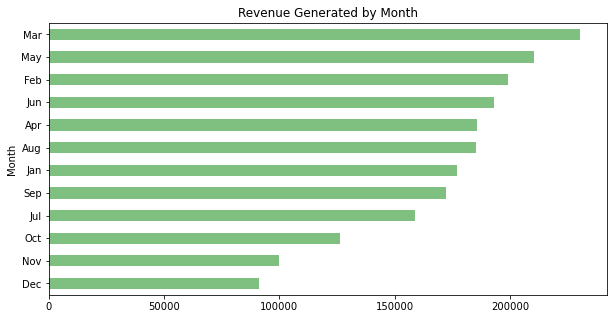

In [260]:
sales_data.groupby(['Month']).sum()['Revenue'].sort_values(ascending = True).plot(kind='barh', color= 'green',
alpha =0.5, figsize = (10,5), title = 'Revenue Generated by Month', xlabel= 'Month')

plt.savefig('Revenue Generated by Month.jpg', dpi=200, transparent=False, bbox_inches='tight')

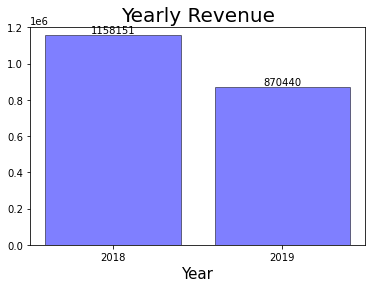

In [261]:
yearly_sales = sales_data.groupby(['Year']).sum()['Revenue'].sort_values(ascending = False)
plt.bar(yearly_sales.index, yearly_sales, fc='blue', ec='black', alpha = 0.5)
plt.xlabel('Year',fontsize= 15)
plt.ylim(0, 1200000)
plt.title('Yearly Revenue', fontsize= 20)

for r in range(len(yearly_sales)):
    plt.text(r, yearly_sales[r],yearly_sales[r], ha= 'center', va= 'bottom')
    
plt.savefig('Yearly Revenue.jpg', dpi=200, transparent=False, bbox_inches='tight')

### Revenue Generated by Region/Items

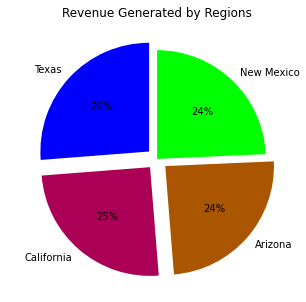

In [266]:
explode = [0.1,0.1,0.1,0]
sales_data.groupby('Region').sum()['Revenue'].sort_values(ascending = False).head(5).plot(kind='pie', autopct='%.0f%%', 
startangle= 90, explode= explode, shadow=False, cmap='brg', figsize=(10,5),
title = 'Revenue Generated by Regions', ylabel = ' ')

plt.savefig('Revenue Generated by Regions.jpg', dpi=200, transparent=False, bbox_inches='tight')

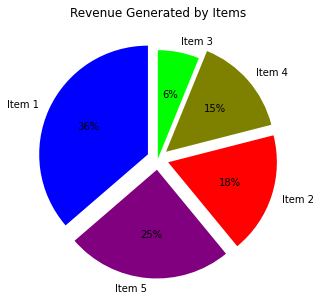

In [264]:
explode = [0.1,0.1,0.1,0.1,0]
sales_data.groupby('Item').sum()['Revenue'].sort_values(ascending = False).head(5).plot(kind='pie', autopct='%.0f%%', 
startangle= 90, explode= explode, shadow=False, cmap='brg', figsize=(10,5),
title = 'Revenue Generated by Items', ylabel = ' ')

plt.savefig('Revenue Generated by Items.jpg', dpi=200, transparent=False, bbox_inches='tight')

### Which Sales Person Generated the Highest Revenue?

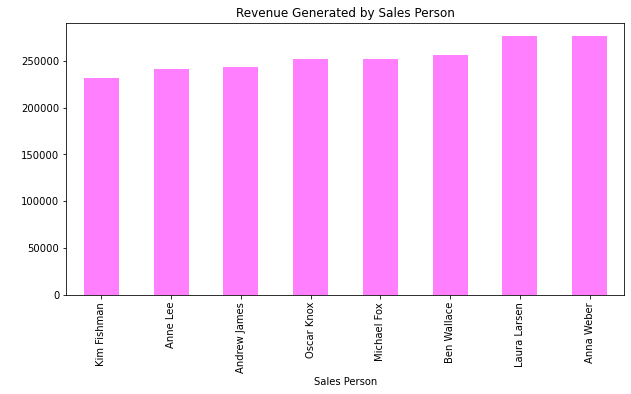

In [267]:
salesrep_revenue = sales_data.groupby(['Sales Person']).sum()['Revenue'].sort_values(ascending = True).plot(kind='bar', color= 'magenta',
alpha =0.5, figsize = (10,5), title = 'Revenue Generated by Sales Person', ylabel= ' ')

plt.savefig('Revenue Generated by Sales Person.jpg', dpi=200, transparent=False, bbox_inches='tight')

### What Region has the highest Sales? 

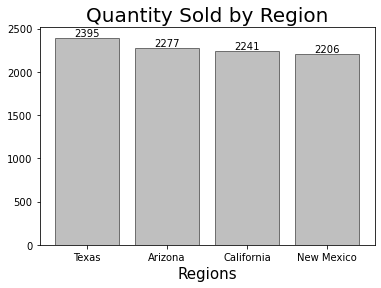

In [269]:
regional_sales = sales_data.groupby(['Region']).sum()['Quantity'].sort_values(ascending = False)
plt.bar(regional_sales.index, regional_sales, fc='grey', ec='black', alpha = 0.5)
plt.xlabel('Regions',fontsize= 15)
plt.title('Quantity Sold by Region', fontsize= 20)

for r in range(len(regional_sales)):
    plt.text(r, regional_sales[r],regional_sales[r], ha= 'center', va= 'bottom')
    
plt.savefig('Quantity sold by Region.jpg', dpi=200, transparent=False, bbox_inches='tight')

### Which Sales Person has the Highest Number of Sales?

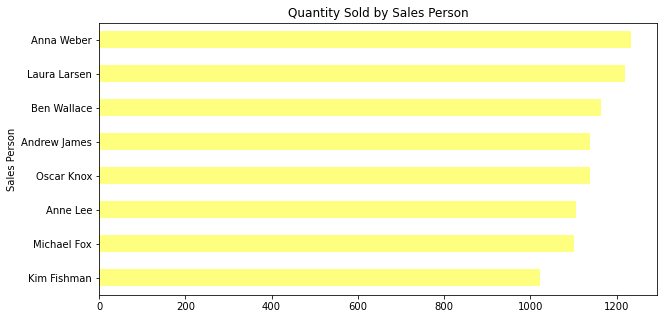

In [271]:
sales_data.groupby(['Sales Person']).sum()['Quantity'].sort_values(ascending = True).plot(kind='barh', color= 'yellow',
alpha =0.5, figsize = (10,5), title = 'Quantity Sold by Sales Person', xlabel= 'Sales Person')

plt.savefig('Quantity Sold by Sales Person.jpg', dpi=200, transparent=False, bbox_inches='tight')

### Which Customer brought in more Revenue?

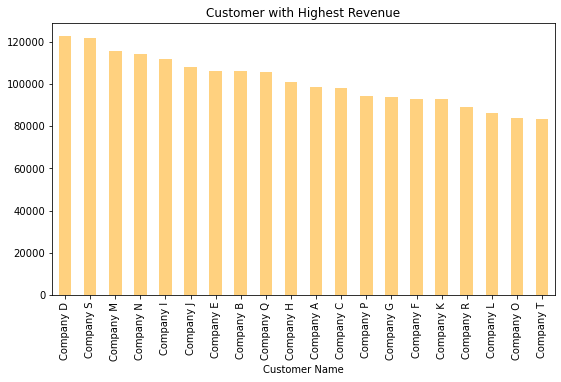

In [273]:
customer_revenue = sales_data.groupby(['Customer Name']).sum()['Revenue'].sort_values(ascending = False).plot(kind='bar', color= 'orange',
alpha =0.5, figsize = (9,5), title = 'Customer with Highest Revenue')

plt.savefig('Revenue Generated by Customers.jpg', dpi=200, transparent=False, bbox_inches='tight')

### What Item did the Customers buy the most?

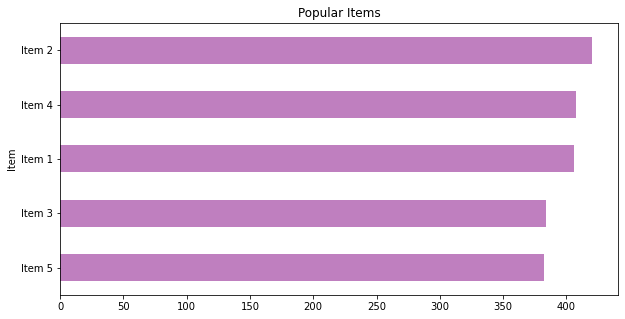

In [274]:
item = sales_data.groupby('Item').count()['Customer Name'].sort_values(ascending = True).plot(kind='barh', color= 'purple',
alpha =0.5, figsize = (10,5), title = 'Popular Items')

plt.savefig('Popular Item Bought.jpg', dpi=200, transparent=False, bbox_inches='tight')

### What item is most expensive?

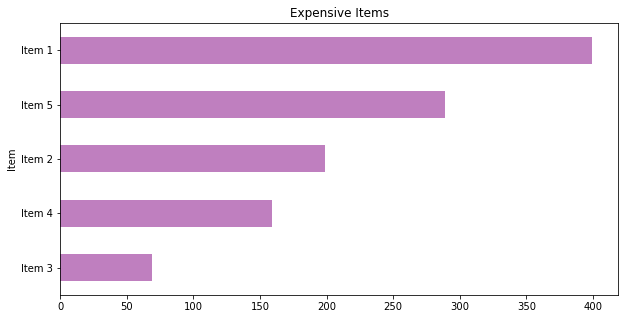

In [275]:
item = sales_data.groupby('Item').max()['Price'].sort_values(ascending = True).plot(kind='barh', color= 'purple',
alpha =0.5, figsize = (10,5), title = 'Expensive Items')

plt.savefig('Expensive Items.jpg', dpi=200, transparent=False, bbox_inches='tight')

### Is there any correlation between quantity and revenue?

In [244]:
coer = sales_data.corr()
coer

,Order ID,Customer ID,Price,Quantity,Revenue
Order ID,1.000000,-0.038712,0.015840,-0.014527,0.001072
Customer ID,-0.038712,1.000000,-0.030497,-0.014387,-0.013271
Price,0.015840,-0.030497,1.000000,-0.017308,0.577710
Quantity,-0.014527,-0.014387,-0.017308,1.000000,0.720722
Revenue,0.001072,-0.013271,0.577710,0.720722,1.000000


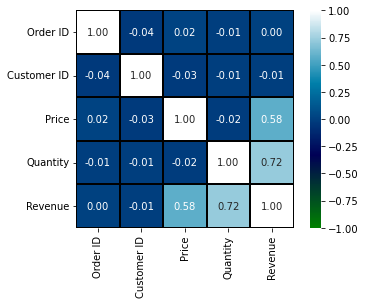

In [291]:
sns.heatmap(coer, cmap='ocean', vmin= -1, vmax=1, annot=True, fmt='.2f', linewidth=2, linecolor='black', square=True)

plt.savefig('Correlation heatmap', dpi=200, transparent=False, bbox_inches='tight')